In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
url = r"C:\Users\Ramu M\Downloads\Insurance Risk and Claim Dataset.csv"
df = pd.read_csv(url)
df.head()

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,POL000001,56.0,Female,Health,73968.80,1,0,3547.17,14048.25,Low
1,POL000002,69.0,Male,Health,128978.03,1,0,2306.97,3901.69,Low
2,POL000003,46.0,Female,Health,77282.87,3,0,926.91,1773.26,Medium
3,POL000004,32.0,Female,Life,65488.60,1,1,5095.42,28134.45,High
4,POL000005,60.0,Male,Health,59238.54,0,1,4688.19,15809.77,High


In [3]:
df.shape

(5000, 10)

In [4]:
def assign_vehicle_age(row):
    if row['Customer_Age'] < 30:
        return np.random.uniform(0.5, 3.0)
    elif row['Customer_Age'] < 50:
        return np.random.uniform(2.0, 7.0)
    else:
        return np.random.uniform(5.0, 15.0)

df['Vehicle_Age'] = df.apply(assign_vehicle_age, axis=1).round(1)


In [5]:
df.head()

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Vehicle_Age
0,POL000001,56.0,Female,Health,73968.80,1,0,3547.17,14048.25,Low,13.9
1,POL000002,69.0,Male,Health,128978.03,1,0,2306.97,3901.69,Low,7.5
2,POL000003,46.0,Female,Health,77282.87,3,0,926.91,1773.26,Medium,3.4
3,POL000004,32.0,Female,Life,65488.60,1,1,5095.42,28134.45,High,3.6
4,POL000005,60.0,Male,Health,59238.54,0,1,4688.19,15809.77,High,12.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Policy_ID         5000 non-null   object 
 1   Customer_Age      4838 non-null   float64
 2   Gender            4757 non-null   object 
 3   Policy_Type       4834 non-null   object 
 4   Annual_Income     4836 non-null   float64
 5   Claim_History     5000 non-null   int64  
 6   Fraudulent_Claim  5000 non-null   int64  
 7   Premium_Amount    5000 non-null   float64
 8   Claim_Amount      5000 non-null   float64
 9   Risk_Score        5000 non-null   object 
 10  Vehicle_Age       5000 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 429.8+ KB


In [7]:
df.describe()

,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Vehicle_Age
count,4838.000000,4836.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,51.159570,75192.012818,1.545000,0.173200,3145.372972,9489.688154,6.910980
std,20.891139,23852.315856,1.238984,0.378458,1521.411871,6438.395177,4.088304
min,18.000000,30000.000000,0.000000,0.000000,502.000000,101.730000,0.500000
25%,34.000000,58508.532500,1.000000,0.000000,1838.127500,4537.107500,3.200000
50%,50.000000,74743.025000,1.000000,0.000000,3208.755000,8756.190000,6.300000
75%,66.000000,91176.995000,2.000000,0.000000,4282.780000,12947.965000,10.200000
max,127.000000,150000.000000,8.000000,1.000000,6996.740000,29942.790000,15.000000


In [8]:
df.isnull().sum()

Policy_ID             0
Customer_Age        162
Gender              243
Policy_Type         166
Annual_Income       164
Claim_History         0
Fraudulent_Claim      0
Premium_Amount        0
Claim_Amount          0
Risk_Score            0
Vehicle_Age           0
dtype: int64

In [9]:
# Median imputation for numeric columns
numeric_cols = ['Annual_Income', 'Customer_Age']
median_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = median_imputer.fit_transform(df[numeric_cols])

In [10]:
# Mode imputation for categorical columns
categorical_cols = ['Policy_Type', 'Gender']
mode_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = mode_imputer.fit_transform(df[categorical_cols])

In [11]:
df.isnull().sum()

Policy_ID           0
Customer_Age        0
Gender              0
Policy_Type         0
Annual_Income       0
Claim_History       0
Fraudulent_Claim    0
Premium_Amount      0
Claim_Amount        0
Risk_Score          0
Vehicle_Age         0
dtype: int64

In [12]:
df.columns

Index(['Policy_ID', 'Customer_Age', 'Gender', 'Policy_Type', 'Annual_Income',
       'Claim_History', 'Fraudulent_Claim', 'Premium_Amount', 'Claim_Amount',
       'Risk_Score', 'Vehicle_Age'],
      dtype='object')

In [12]:
# Rename columns to lowercase snake_case
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

print(df.columns)

Index(['policy_id', 'customer_age', 'gender', 'policy_type', 'annual_income',
       'claim_history', 'fraudulent_claim', 'premium_amount', 'claim_amount',
       'risk_score', 'vehicle_age'],
      dtype='object')


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your DataFrame loaded as df
sns.set(style="whitegrid")

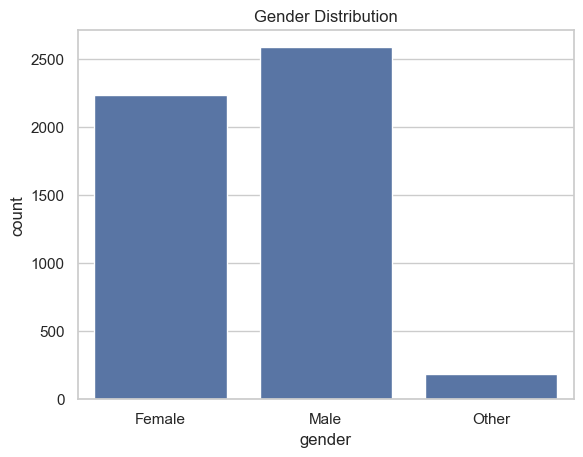

In [15]:
# 1. Gender distribution
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

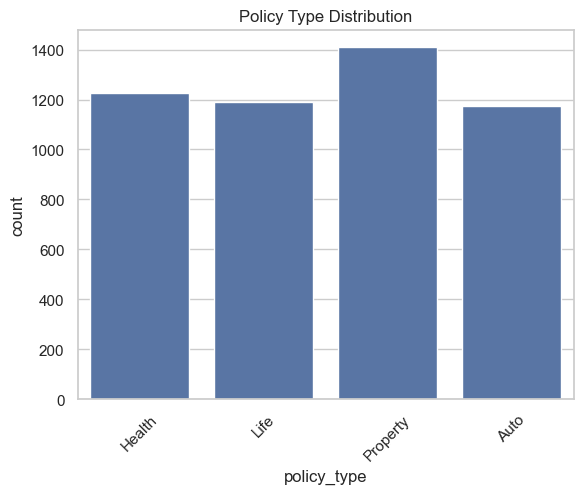

In [17]:
# 2. Policy Type distribution
sns.countplot(x='policy_type', data=df)
plt.title("Policy Type Distribution")
plt.xticks(rotation=45)
plt.show()

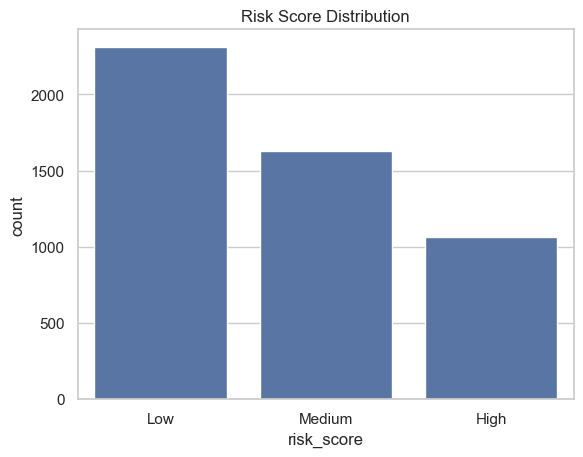

In [18]:
# 3. Risk Score distribution
sns.countplot(x='risk_score', data=df)
plt.title("Risk Score Distribution")
plt.show()


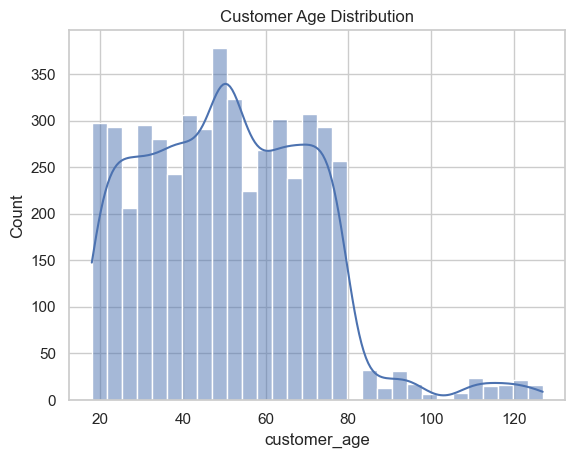

In [19]:
# 4. Customer Age distribution
sns.histplot(df['customer_age'], bins=30, kde=True)
plt.title("Customer Age Distribution")
plt.show()


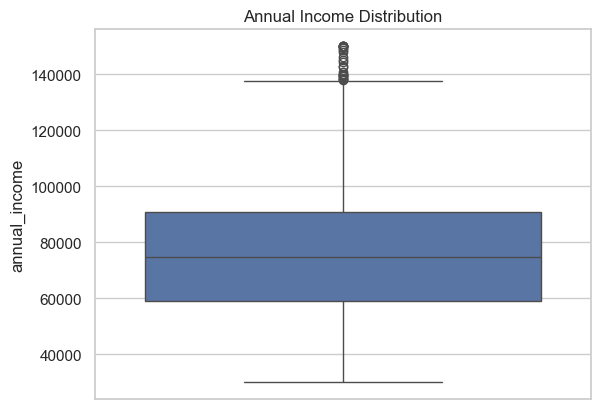

In [20]:
# 5. Annual Income distribution
sns.boxplot(y='annual_income', data=df)
plt.title("Annual Income Distribution")
plt.show()

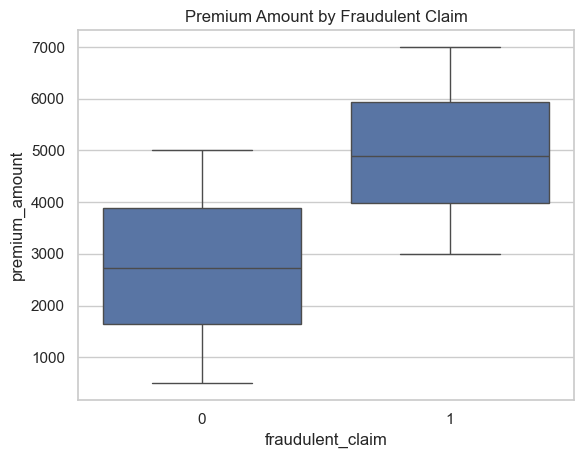

In [21]:
# 6. Premium Amount vs Fraud
sns.boxplot(x='fraudulent_claim', y='premium_amount', data=df)
plt.title("Premium Amount by Fraudulent Claim")
plt.show()

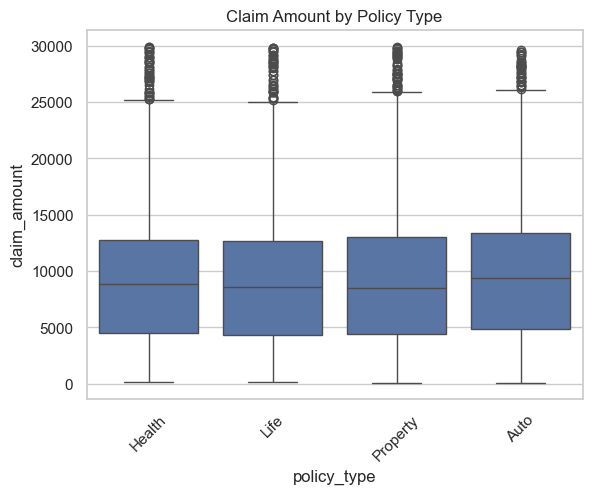

In [22]:
# 7. Claim Amount by Policy Type
sns.boxplot(x='policy_type', y='claim_amount', data=df)
plt.title("Claim Amount by Policy Type")
plt.xticks(rotation=45)
plt.show()


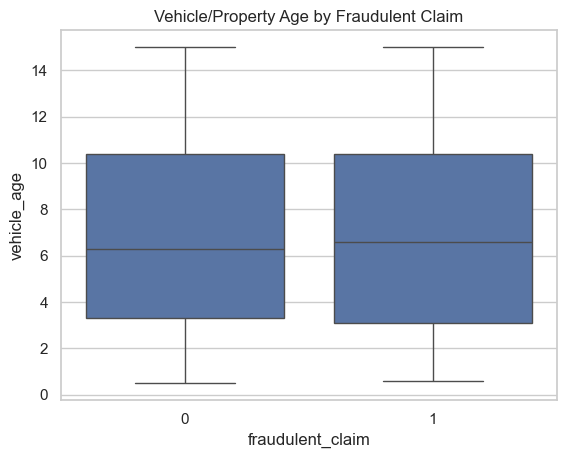

In [23]:
# 8. Vehicle/Property Age vs Fraud
sns.boxplot(x='fraudulent_claim', y='vehicle_age', data=df)
plt.title("Vehicle/Property Age by Fraudulent Claim")
plt.show()

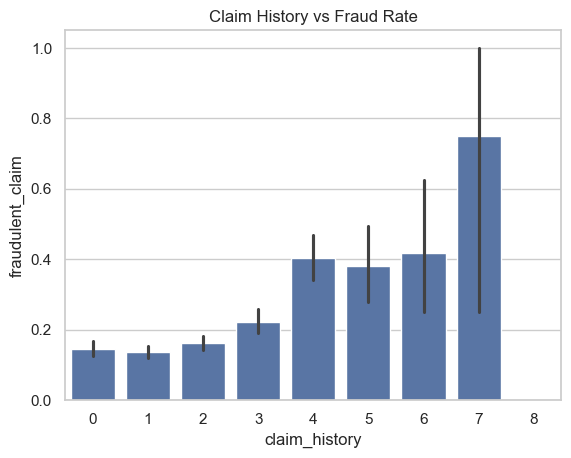

In [24]:
# 9. Claim History vs Fraudulent Claim
sns.barplot(x='claim_history', y='fraudulent_claim', data=df)
plt.title("Claim History vs Fraud Rate")
plt.show()


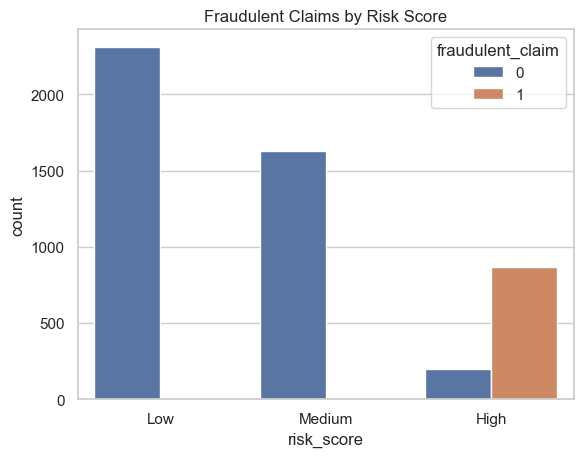

In [25]:
# 10. Risk Score vs Fraudulent Claim
sns.countplot(x='risk_score', hue='fraudulent_claim', data=df)
plt.title("Fraudulent Claims by Risk Score")
plt.show()


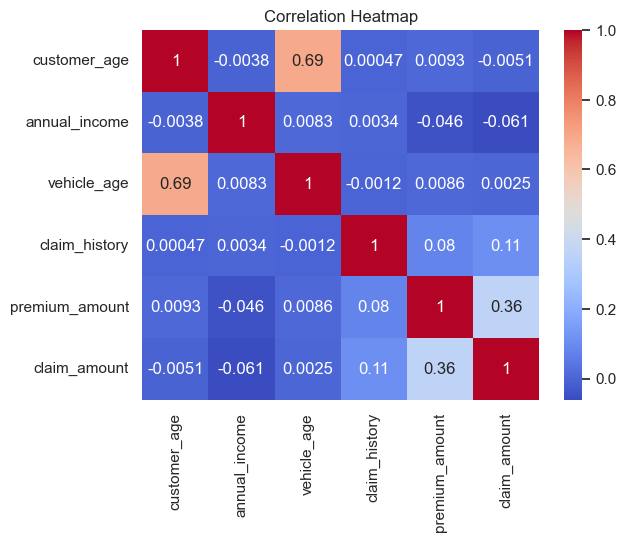

In [26]:
# 11. Correlation Heatmap
numeric_cols = ['customer_age', 'annual_income', 'vehicle_age', 'claim_history', 'premium_amount', 'claim_amount']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

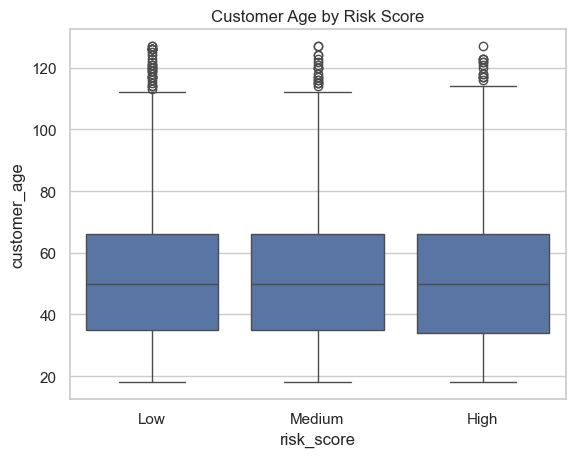

In [27]:
# 12. Age vs Risk Score
sns.boxplot(x='risk_score', y='customer_age', data=df)
plt.title("Customer Age by Risk Score")
plt.show()


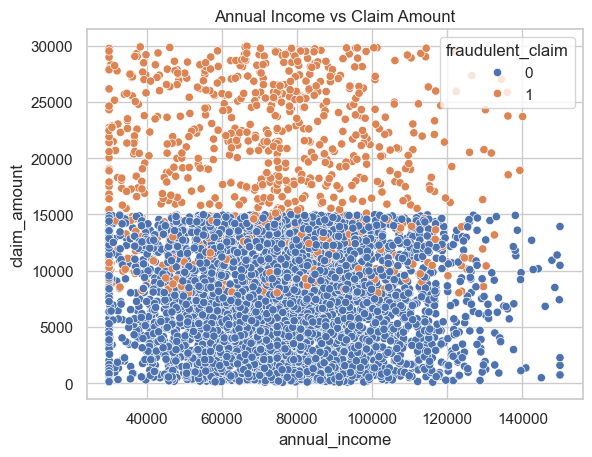

In [28]:
# 13. Income vs Claim Amount
sns.scatterplot(x='annual_income', y='claim_amount', hue='fraudulent_claim', data=df)
plt.title("Annual Income vs Claim Amount")
plt.show()

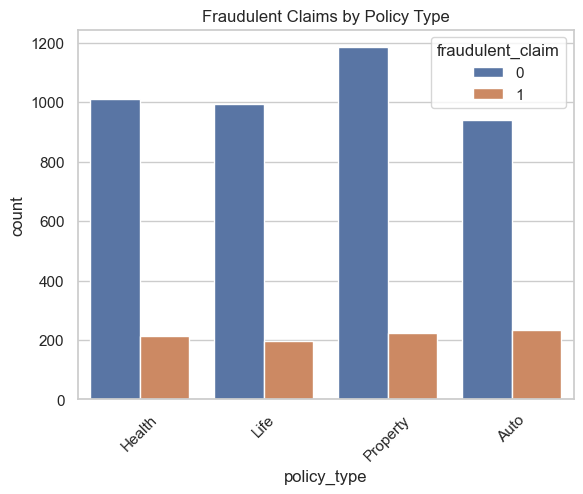

In [29]:
# 14. Policy Type vs Fraudulent Claim
sns.countplot(x='policy_type', hue='fraudulent_claim', data=df)
plt.title("Fraudulent Claims by Policy Type")
plt.xticks(rotation=45)
plt.show()

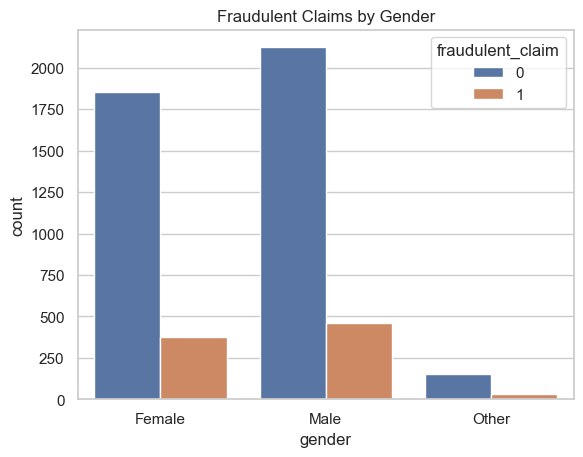

In [30]:
# 15. Gender vs Fraudulent Claim
sns.countplot(x='gender', hue='fraudulent_claim', data=df)
plt.title("Fraudulent Claims by Gender")
plt.show()

In [13]:
df.head()

,policy_id,customer_age,gender,policy_type,annual_income,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score,vehicle_age
0,POL000001,56.0,Female,Health,73968.80,1,0,3547.17,14048.25,Low,13.9
1,POL000002,69.0,Male,Health,128978.03,1,0,2306.97,3901.69,Low,7.5
2,POL000003,46.0,Female,Health,77282.87,3,0,926.91,1773.26,Medium,3.4
3,POL000004,32.0,Female,Life,65488.60,1,1,5095.42,28134.45,High,3.6
4,POL000005,60.0,Male,Health,59238.54,0,1,4688.19,15809.77,High,12.4


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['risk_score'] = encoder.fit_transform(df['risk_score'])
df['policy_type'] = encoder.fit_transform(df['policy_type'])
df['gender'] = encoder.fit_transform(df['gender'])
df.head()

,policy_id,customer_age,gender,policy_type,annual_income,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score,vehicle_age
0,POL000001,56.0,0,1,73968.80,1,0,3547.17,14048.25,1,13.9
1,POL000002,69.0,1,1,128978.03,1,0,2306.97,3901.69,1,7.5
2,POL000003,46.0,0,1,77282.87,3,0,926.91,1773.26,2,3.4
3,POL000004,32.0,0,2,65488.60,1,1,5095.42,28134.45,0,3.6
4,POL000005,60.0,1,1,59238.54,0,1,4688.19,15809.77,0,12.4


In [15]:
# IQR method
Q1 = df['claim_amount'].quantile(0.25)
Q3 = df['claim_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['claim_amount'] >= lower_bound) & 
                        (df['claim_amount'] <= upper_bound)]


In [16]:
from scipy.stats import zscore
import numpy as np

# Compute Z-scores
df['z_score_claim'] = zscore(df['claim_amount'])

# Set threshold (commonly 3)
df_z_filtered = df[np.abs(df['z_score_claim']) < 3]

# Drop the temporary z_score column if needed
df_z_filtered = df_z_filtered.drop(columns='z_score_claim')


In [17]:
print ("Normalize numerical features like annual_income, claim_amount, premium_amount using MinMaxScaler.")

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Normalize numerical features like annual_income, claim_amount, premium_amount using MinMaxScaler.


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df_encoded is your encoded DataFrame
# Select the columns to scale
cols_to_scale = ['annual_income', 'claim_amount', 'premium_amount']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Display the scaled DataFrame
print(df[cols_to_scale].head())


   annual_income  claim_amount  premium_amount
0       0.366407      0.547896        0.468867
1       0.824817      0.149283        0.277913
2       0.394024      0.065667        0.065424
4       0.243655      0.617099        0.644551
5       0.716059      0.514383        0.433677


<Axes: ylabel='claim_amount'>

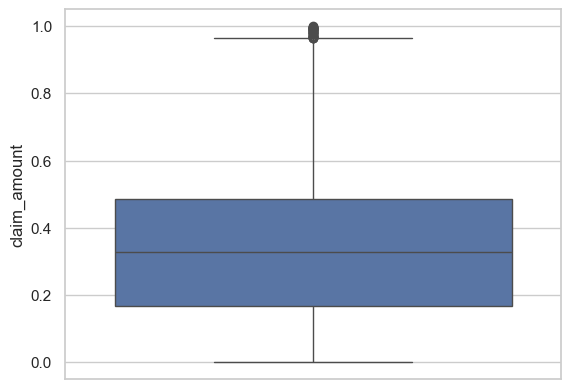

In [24]:

sns.boxplot(df['claim_amount'])

In [20]:
df.shape

(4814, 12)

In [21]:
df.columns

Index(['policy_id', 'customer_age', 'gender', 'policy_type', 'annual_income',
       'claim_history', 'fraudulent_claim', 'premium_amount', 'claim_amount',
       'risk_score', 'vehicle_age', 'z_score_claim'],
      dtype='object')

In [19]:
features = ['policy_id', 'customer_age', 'gender', 'policy_type', 'annual_income',
       'claim_history', 'fraudulent_claim', 'premium_amount', 'claim_amount',
       'risk_score', 'vehicle_age', 'z_score_claim']

X = df[features]


In [20]:
df = df.drop(columns=['policy_id'], axis = 1 )


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Assuming df is your DataFrame and you want to apply anomaly detection on some numeric features
X = df.select_dtypes(include=['float64', 'int64'])  # or specify columns manually like df[['col1', 'col2']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['iso_forest_anomaly'] = iso_forest.fit_predict(X_scaled)
df['iso_forest_anomaly'] = df['iso_forest_anomaly'].map({1: 0, -1: 1})  # 1 = anomaly


In [23]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['iso_forest_anomaly'] = iso_forest.fit_predict(X_scaled)
df['iso_forest_anomaly'] = df['iso_forest_anomaly'].map({1: 0, -1: 1})  # 1 = anomaly


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 8

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='linear')(encoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=0)

# Compute reconstruction errors
reconstructions = autoencoder.predict(X_scaled)
mse = tf.keras.losses.mse(X_scaled, reconstructions).numpy()
df['autoencoder_mse'] = mse

# Define threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(mse, 95)
df['autoencoder_anomaly'] = (df['autoencoder_mse'] > threshold).astype(int)


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
df['anomaly_tag'] = df[['iso_forest_anomaly', 'autoencoder_anomaly']].max(axis=1)


In [26]:
df.columns

Index(['customer_age', 'gender', 'policy_type', 'annual_income',
       'claim_history', 'fraudulent_claim', 'premium_amount', 'claim_amount',
       'risk_score', 'vehicle_age', 'z_score_claim', 'iso_forest_anomaly',
       'autoencoder_mse', 'autoencoder_anomaly', 'anomaly_tag'],
      dtype='object')

In [32]:
df["fraudulent_claim"].value_counts()


fraudulent_claim
0    4134
1     680
Name: count, dtype: int64

In [27]:
df_model = df.drop(columns=['autoencoder_mse'])


In [33]:
df.tail(10)

,customer_age,gender,policy_type,annual_income,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score,vehicle_age,z_score_claim,iso_forest_anomaly,autoencoder_mse,autoencoder_anomaly,anomaly_tag
4990,38.0,1,2,0.545960,0,0,0.271523,0.483716,1,3.3,0.666990,0,0.000007,0,0
4991,36.0,0,2,0.172048,0,0,0.355112,0.031184,1,6.8,-1.449619,0,0.000034,0,0
4992,70.0,1,2,0.788203,7,1,0.392471,0.434010,0,14.6,0.434500,1,0.369828,1,1
4993,36.0,1,2,0.423235,2,1,0.416588,0.987125,0,6.3,3.021564,1,0.188467,1,1
4994,74.0,0,1,0.511228,3,0,0.373162,0.542902,2,8.1,0.943820,0,0.000031,0,0
4995,42.0,0,0,0.056850,1,0,0.680266,0.474817,1,3.9,0.625365,0,0.000127,0,0
4996,39.0,0,0,0.816194,4,0,0.605561,0.408142,0,2.5,0.313509,0,0.000092,0,0
4997,114.0,0,3,0.119884,1,0,0.320144,0.120373,1,7.1,-1.032462,0,0.000183,0,0
4998,34.0,0,1,0.588518,0,0,0.483370,0.050069,1,6.7,-1.361291,0,0.000026,0,0
4999,72.0,1,3,0.167756,1,0,0.453946,0.383729,1,7.8,0.199325,0,0.000084,0,0


In [34]:
# Save to CSV
df.to_csv('insurance_risk.csv', index=False)

print("CSV file saved successfully.")


CSV file saved successfully.


In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fraudulent_claim', 'autoencoder_mse'])  # drop ID + unused
y = df['fraudulent_claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new balance
from collections import Counter
print("After SMOTE:", Counter(y_train_smote))


After SMOTE: Counter({1: 3307, 0: 3307})


In [38]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)  # Train on balanced data


LogisticRegression(max_iter=1000)

In [39]:
y_pred_lr = lr_model.predict(X_test)


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("🔍 Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


🔍 Logistic Regression Evaluation:
Accuracy: 0.9968847352024922
Precision: 0.9784172661870504
Recall: 1.0
F1-Score: 0.9890909090909091

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       827
           1       0.98      1.00      0.99       136

    accuracy                           1.00       963
   macro avg       0.99      1.00      0.99       963
weighted avg       1.00      1.00      1.00       963

Confusion Matrix:
 [[824   3]
 [  0 136]]


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)  # Train on SMOTE-balanced data


RandomForestClassifier(random_state=42)

In [42]:
y_pred_rf = rf_model.predict(X_test)


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("🔍 Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔍 Random Forest Evaluation:
Accuracy: 0.9979231568016614
Precision: 0.9855072463768116
Recall: 1.0
F1-Score: 0.9927007299270073

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       827
           1       0.99      1.00      0.99       136

    accuracy                           1.00       963
   macro avg       0.99      1.00      1.00       963
weighted avg       1.00      1.00      1.00       963

Confusion Matrix:
 [[825   2]
 [  0 136]]


C:\Users\Ramu M\AppData\Local\Temp\ipykernel_29364\4126159634.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ramu M\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


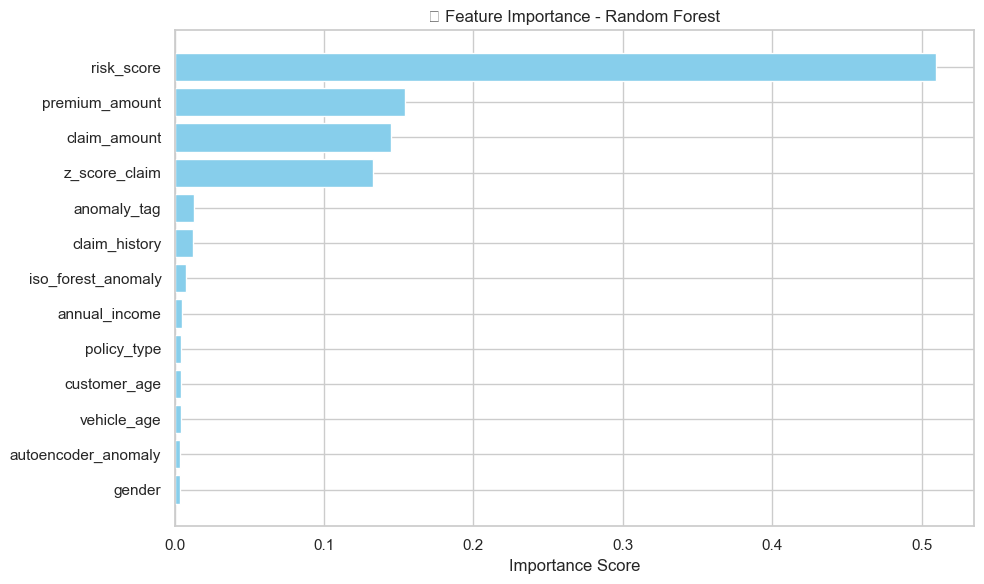

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature names from your training data
feature_names = X_train.columns
importances = rf_model.feature_importances_

# Create DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("🔍 Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_model.predict(X_test)

print("🔍 XGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


🔍 XGBoost Evaluation:
Accuracy: 0.9968847352024922
Precision: 0.9784172661870504
Recall: 1.0
F1-Score: 0.9890909090909091

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       827
           1       0.98      1.00      0.99       136

    accuracy                           1.00       963
   macro avg       0.99      1.00      0.99       963
weighted avg       1.00      1.00      1.00       963

Confusion Matrix:
 [[824   3]
 [  0 136]]


C:\Users\Ramu M\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:53:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


C:\Users\Ramu M\AppData\Local\Temp\ipykernel_29364\2162614812.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ramu M\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


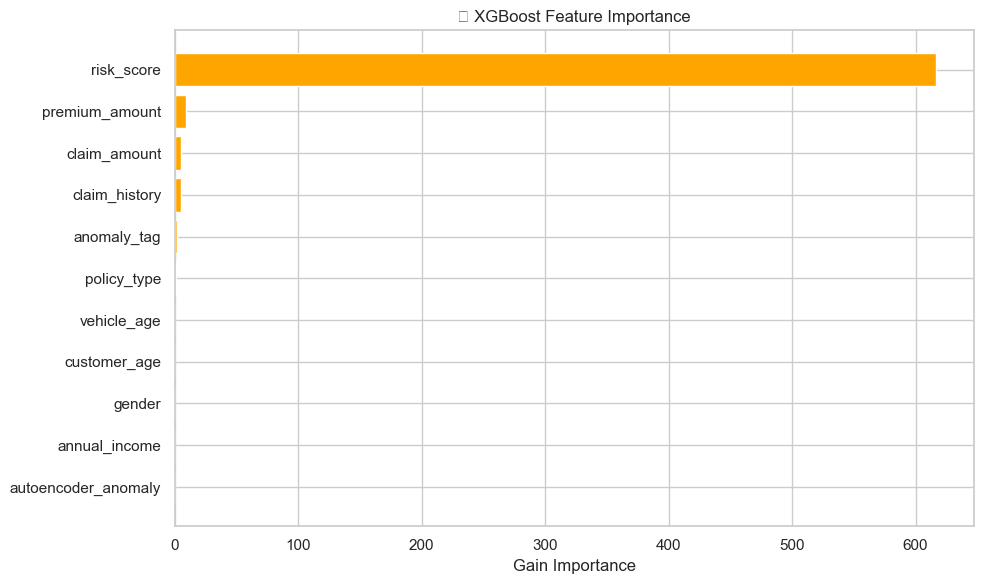

In [46]:
import pandas as pd
import numpy as np

# Get importance scores as a dictionary
importance_dict = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame for sorting and plotting
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel("Gain Importance")
plt.title("🔍 XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [48]:
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


In [49]:
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


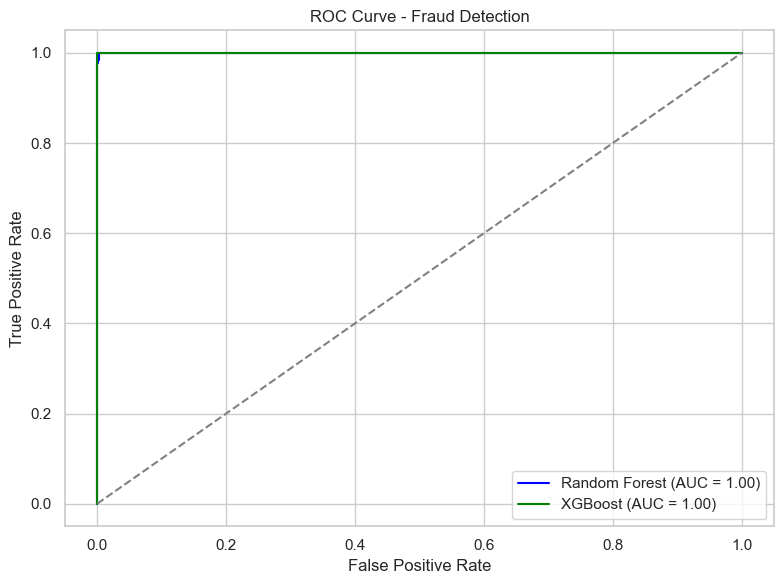

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # baseline

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Fraud Detection')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
import pickle

In [52]:
import pickle
pickle.dump(xgb_model, open("fraud_detection_model.pkl", 'wb'))


In [60]:
import pickle

# Open the file in binary read mode and load the model
with open('fraud_detection_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [62]:
# loading the saved model
loaded_model = pickle.load(open('fraud_detection_model.pkl', 'rb')) 

In [65]:
import pandas as pd
import pickle

# Load model
with open('fraud_detection_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Create input in correct format
input_data = pd.DataFrame([[
    56.0,         # customer_age
    0,            # gender (0: Female, 1: Male)
    1,            # policy_type (e.g., 1: Health)
    0.366407,     # annual_income
    1,            # claim_history
    0.468867,     # premium_amount
    0.547896,     # claim_amount
    1,            # risk_score
    7.3,          # vehicle_age
    0.967178,     # z_score_claim
    0.0,          # iso_forest_anomaly
    0.030825,     # autoencoder_anomaly
    0             # anomaly_tag
]], columns=[
    'customer_age', 'gender', 'policy_type', 'annual_income', 'claim_history',
    'premium_amount', 'claim_amount', 'risk_score', 'vehicle_age',
    'z_score_claim', 'iso_forest_anomaly', 'autoencoder_anomaly', 'anomaly_tag'
])

# Predict
prediction = model.predict(input_data)

# Output
if prediction[0] == 0:
    print("Prediction: No Fraud")
else:
    print("Prediction: Fraud")


Prediction: No Fraud


In [54]:
df.iloc[2].tolist()

[46.0,
 0.0,
 1.0,
 0.3940239166666667,
 3.0,
 0.0,
 0.06542371211164727,
 0.06566692870109885,
 2.0,
 4.9,
 -1.2883354021571942,
 0.0,
 5.884317488380475e-06,
 0.0,
 0.0]

In [66]:
for column in X.columns:
  print(column)

customer_age
gender
policy_type
annual_income
claim_history
premium_amount
claim_amount
risk_score
vehicle_age
z_score_claim
iso_forest_anomaly
autoencoder_anomaly
anomaly_tag


In [ ]:
df.head()